# ACR Phantom Gradients Using Circularity

Simplified notebook after pushing useful routines back into the `mriqa` package.

In [1]:
import numpy as np
import pandas as pd
from mriqa.dcmio import fetch_series
import matplotlib.pyplot as plt
import seaborn as sns
from mriqa.reports import circularity_report
from mriqa.phantoms import ACR40

In [2]:
# ACR scan 2mm slice SE for orientation
patid = 'PQACRY20160411RHD'
stuid = '1'
sernos = [10]
dobjs = fetch_series(patid, stuid, sernos)

## Gradient Measurements
### General Notes
There are details in the [ACR accreditation instructions](http://www.acr.org/~/media/ACR/Documents/Accreditation/MRI/LargePhantomGuidance.pdf).

This is the ACR *Large* phantom (190mm diameter, length 148mm) - filled with 10mM NiCl<sub>2</sub>, 75mM NaCl.

We could use a perfectly aligned template to remove small rotations and shifts.
Gross errors should be avoidable as there are unambiguous set up marks on the phantom.
They seem to use multiple series (T<sub>1</sub>W, T<sub>2</sub>W etc) with quite course slices (5mm + 3mm).
They recommend twiddling the windowing when making measurements - we can probably do this in a more principled way.

### Gradient Strength Calibration
For these they measure the size of the phantom so we'll want
 - Full slice coverage (or a non-axial view)
 - Sufficient BW in S/S and R/O to minimise B<sub>0</sub> effects on scale/distortion
 - Relatively easy to do with edge detection and peak location
 - In-plane they take the phantom diameters at 4 angles at the level of the distortion grid
 - Expect 190mm &oslash; by 140mm length, both &plusmn;2mm
 - NB gradient amplifier warm up effects (really? for solid state amps?)

It's not very clear what the tube in the anterior-foot part of the phantom is. Also we don't know if the grid near the centre is accurate enough to be used for a distortion assessment.

We'll do the circularity test here, but we'll need to find a suitable slice and clean up the image so we get the edges properly. The uniform area 37-47 look like the easiest.

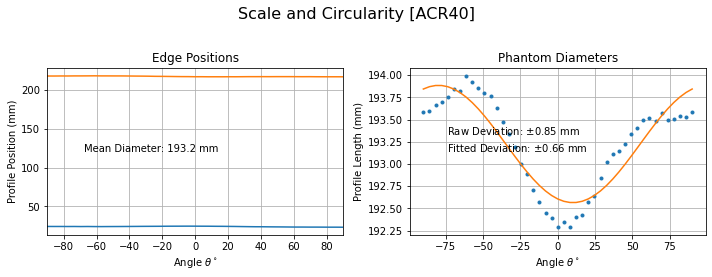

Nominal    Diameter  Deviation  FittedDeviation
ACR40      190  193.239843   0.852347         0.658555

In [3]:
circularity_report(dobjs[40], phantom=ACR40)

The fit could be better - maybe we should use extra harmonics. Still, &pm;0.7mm is not that bad.

Note though that the scale is *slightly* wrong, that is 193mm vs 190mm - about **1.6%** too large. That would correspond to a volume error of nearly 5% so not insignificant in some contexts.